<a href="https://colab.research.google.com/github/jeffersonverissimo/Data_Science/blob/master/An%C3%A1lise_Explorat%C3%B3ria_dos_Casos_de_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://images.unsplash.com/flagged/photo-1584036561584-b03c19da874c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80)






---

# **ANÁLISE EXPLORATÓRIA DOS CASOS DE COVID-19**
---
---
O mundo está enfrentando uma das maiores pandemias da história. O cenário causado pelo novo coronavírus é semelhante a vários outros momentos da humanidade, em que doenças se espalharam pelo mundo e causaram grandes devastações. Atualmente, o vírus responsável pela doença COVID-19 já se alastrou por mais de 100 países, infectando mais de 700 mil pessoas.

**A origem do vírus**

Os coronavírus são uma grande família viral, que vem sendo estudada desde a década de 1960, que causam vários tipos doenças infecciosas em animais silvestres, animais de criação e animais de estimação. E os mais recentes hospedeiros, os seres humanos.

Segundo o Ministério da Saúde, os primeiros coronavírus humanos foram isolados pela primeira vez em 1937. No entanto, foi em 1965 que o vírus foi descrito como coronavírus, em decorrência do perfil na microscopia, parecendo uma coroa.

**Manifestações Clínicas**

Geralmente, em humanos, vários coronavírus causam doenças respiratórias leves ou moderadas, semelhantes a um resfriado comum. Os sintomas podem envolver coriza, tosse, dor de garganta e febre. Contudo, em alguns casos, as pessoas podem desenvolver infecções nas vias respiratórias inferiores, como pneumonia ou doenças mais graves, como a Síndrome Respiratória do Oriente Médio (MERS-CoV) e a Síndrome Respiratória Aguda Grave (SARS-CoV). O coronavírus recentemente descoberto é o causador da doença COVID-19.

**O que é a COVID-19? Quais os seus sintomas?**

É uma doença infecciosa causada pelo novo coronavírus, descoberto recentemente a paritr do início do surto em Wuhan, capital e maior cidade da província de Hubei, na China, em dezembro de 2019.

De acordo com a Organização Mundial da Saúde, os sintomas mais comuns da COVID-19 são febre, cansaço e tosse seca. Sendo que alguns pacientes podem apresentar dores, congestão nasal, dor de garganta e diarreia. As pessoas idosas e as que têm doenças crônicas, como hipertensão ou problemas cardíacos e diabetes, possuem maior probabilidade de desenvolver doenças graves.


## **AQUISIÇÃO DOS DADOS**

Todos os dados usados neste *notebook* foram obtidos a partir do repositório da *Johns Hapkins University* no *Github*, que você pode acessar através deste [link](https://github.com/CSSEGISandData).

Para esta análise exploratória inicial, serão utilizados apenas os seguintes arquivos:

*   *`time_series_covid19_confirmed_global.csv`*
*   *`time_series_covid19_deaths_global.csv`*
*   *`time_series_covid19_recovered_global.csv`*

In [0]:
# IMPORTAÇÃO DOS PACOTES NECESSÁRIOS PARA REALIZAR AS ANÁLISES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# IMPORTAÇÃO DOS CONJUNTOS DE DADOS A SEREM ANALISADOS

# Casos de Infecção Confirmados de COVID-19
df1 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# Casos de Mortes Confirmadas de COVID-19
df2 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Casos de Pessoas Recuperadas da COVID-19
df3 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
# INICIALMENTE, PODEMOS VERIFICAR QUAIS AS DIMENSÕES DOS NOSSOS DATASETS

df1.shape

(254, 73)

Assim, identificamos que todos o *datasets* possuem as mesmas dimensões de **254 linhas** e **73 colunas**.

---

In [6]:
# VISUALIZANDO E IDENTIFICANDO AS VARIÁVEIS QUE COMPÕEM OS NOSSOS DATASETS

df1.head()

# O COMANDO ACIMA NOS DEVOLVE AS 5 PRIMEIRAS LINHAS DO DATASET COMO RESULTADOS

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7


Podemos verificar acima que os nossos conjuntos de dados nos trazem informações dos casos registrados, suas respectivas datas e as regiões dos ocorridos, incluindo as suas coordenadas geográficas.

---

**Desta forma, levando em consideração que os conjuntos de dados possuem as mesmas variáveis, podemos juntá-los em um novo *dataframe*.**

**Contudo, antes devemos realizar um tratamento para deixar os nossos conjuntos de dados nas formas mais fáceis de trabalhar e que nos permita realizar as análises de forma correta.**

## **TRATAMENTO DOS CONJUNTOS DE DADOS**

Como estamos interessados em analisar o comportamento da pandemia no mundo inteiro, não necessitamos, por hora, das informações relacionadas às regiões onde ocorreram os casos.

Sendo assim, iremos criar novos *dataframes* com informações apenas das datas e números de ocorridos. 

In [0]:
# CRIANDO OS NOVOS DATAFRAMES

confir = np.sum(df1.iloc[:,4:df1.shape[1]])
confir.index = pd.DatetimeIndex(confir.index)

mortes = np.sum(df2.iloc[:,4:df2.shape[1]])
mortes.index = pd.DatetimeIndex(mortes.index)

recup = np.sum(df3.iloc[:,4:df3.shape[1]])
recup.index = pd.DatetimeIndex(recup.index)

Após a criação dos novos *dataframes* contendo individualmente seus casos registrados, vamos juntar os 3 conjuntos de dados para criar um novo contendo todas as informações que necessitamos.

In [8]:
# CRIANDO UM DATAFRAME COM TODOS OS CASOS OCORRIDOS

df = pd.concat([confir,mortes,recup], axis=1)
df.columns = ['Casos_Confirmados','Mortes_Confirmadas','Pacientes_Recuperados']
df.head()

,Casos_Confirmados,Mortes_Confirmadas,Pacientes_Recuperados
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


Podemos ainda, realizar o cálculo da mortalidade causada pela COVID-19.

Assim, para descobrirmos a mortalidade, dividimos o número de mortes pelo número de casos confirmados.

In [0]:
mortalidade = (mortes/confir)*100

## **GRÁFICOS**

Inicialmente, podemos gerar visualizar os gráficos individualmente para cada situação estudada. Ou seja:


*   Casos Confirmados;
*   Mortes Confirmadas; e
*   Pacientes Recuperados.



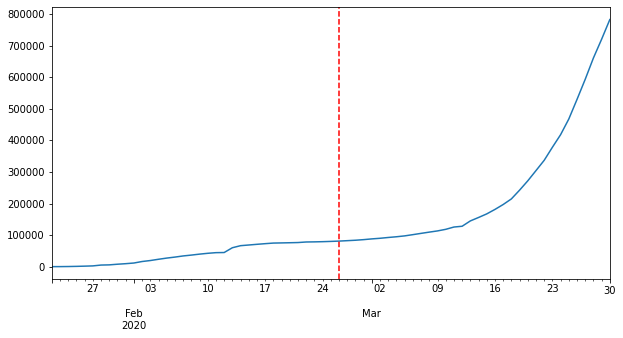

In [10]:
# Casos Confirmados

confir.plot(figsize=(10,5))
plt.axvline(x='2020-02-26', ymin=0, ymax=800000, color ='r', linestyle='dashed');

In [11]:
# Total de Casos Confirmados

total_casos = confir.max()
print('N° Total de Casos: {}'.format(total_casos))

N° Total de Casos: 782365


---

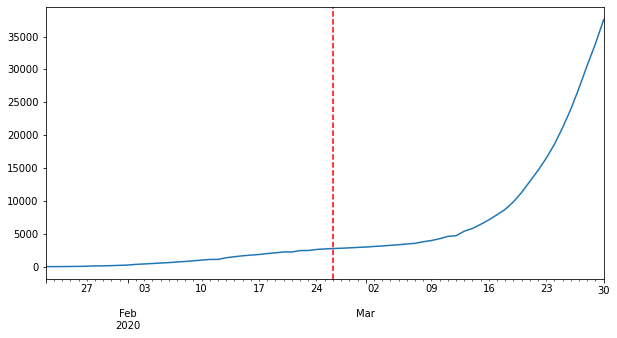

In [12]:
# Mortes Confirmadas

mortes.plot(figsize=(10,5))
plt.axvline(x='2020-02-26', ymin=0, ymax=100000, color ='r', linestyle='dashed');

In [13]:
# Total de Mortes Confirmadas

total_mortes = mortes.max()
print('N° Total de Mortes: {}'.format(total_mortes))

N° Total de Mortes: 37582


---

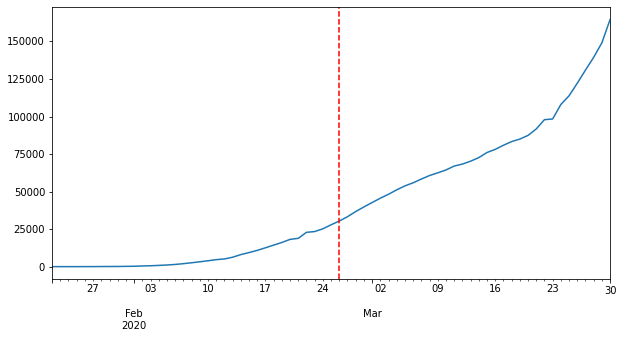

In [14]:
# Pacientes Recuperados

recup.plot(figsize=(10,5))
plt.axvline(x='2020-02-26', ymin=0, ymax=200000, color ='r', linestyle='dashed');

In [15]:
# Total de Pacientes Recuperados

total_recup = recup.max()
print('N° Total de Recuperados: {}'.format(total_recup))

N° Total de Recuperados: 164566


---

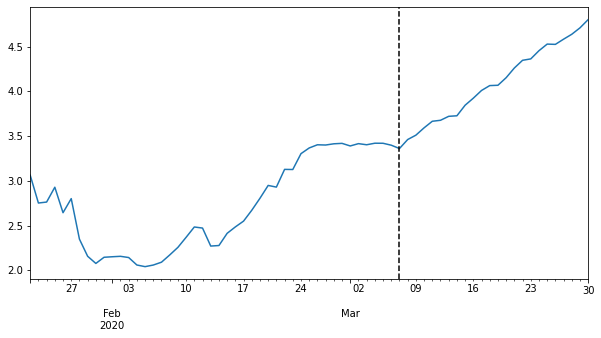

In [16]:
# Mortalidade

mortalidade.plot(figsize=(10,5))
plt.axvline(x='2020-03-07', ymin=0, ymax=10, color ='k', linestyle='dashed');

In [17]:
# Taxa de Mortalidade

indice_mort = mortalidade.max()
print('Taxa de Mortalidade: {:.2f}%'.format(indice_mort))

Taxa de Mortalidade: 4.80%


---

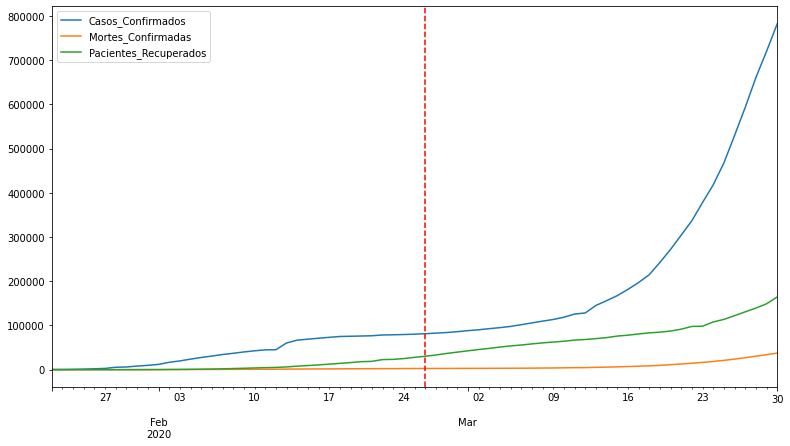

In [18]:
# Comparativo entre n° de casos x n° de mortes x n° de recuperados

df.plot(figsize=(13,7))
plt.axvline(x='2020-02-26', ymin=0, ymax=800000, color ='r', linestyle='dashed');

---

### **CONCLUSÕES**

Com essa análise exploratória de dados, podemos verificar que o cenário atual da pandemia tende a piorar ao longo dos próximos dias. Isso é verificado nos baseando no comportamento exponencial do número de casos de infecção confirmados ao redor do mundo.
O número de recuperados ainda é muito pouco quando comparado ao total de infectados.
Podemos perceber que, partir do dia 26 de fevereiro de 2020, o número de casos confirmados começaram a crescer de forma alarmante e apesar de a taxa de mortalidade da COVID-19 ser baixa (cerca de 4,8%) quando comparadas à outras doenças, devemos ter consciência que a propagação do vírus se dá de maneira muito rápida, fazendo com que o número total de mortes suba exponencialmente.

A Ciência de Dados é uma das melhores armas no combate à pandemia do coronavírus. A partir dela, podemos estudar os casos atuais e prever todos os possíveis cenários futuros e, desta forma, implementar medidas e encontrar soluções para frear o avanço do coronavírus.

Desta maneira, faz-se necessário seguir todas as recomendações dos cientistas e profissionais da saúde para evitar que o cenário se torna ainda pior nos próximas semanas.

---